In [85]:
import pandas as pd
from astropy.wcs import WCS
import numpy as np
from astropy.io import fits
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from skimage.draw import circle

In [2]:
coma_proj = pd.read_csv('/home/rt2122/Data/coma_wise_idx.csv', index_col='index')

In [11]:
cur_proj = coma_proj.loc[19927]
cur_proj

COADD_ID                                   1954p287
RA                                          195.429
DEC                                         28.7744
BAND                                              2
LGAL                                        69.4813
BGAL                                        87.1963
LAMBDA                                      181.524
BETA                                        32.3033
MJDMIN                                      55362.1
MJDMAX                                      57911.4
MJDMEAN                                     56867.1
DT                                          2549.24
COVMIN                                          120
COVMAX                                          176
COVMED                                          153
N_EXP                                          1589
N_CALIB                                        3338
NAXIS                                   [2048 2048]
CD          [[-0.00076389, 0.0], [0.0, 0.00076389]]
CDELT       

In [4]:
w = WCS(naxis=2)

In [16]:
w.wcs.cd = cur_proj['CD']
w.wcs.cdelt = cur_proj['CDELT'][0]
w.wcs.crpix = cur_proj['CRPIX'][0]
w.wcs.crval = cur_proj['CRVAL'][0]
w.wcs.ctype = ['RA---TAN', 'DEC--TAN']
w.wcs.lonpole = cur_proj['LONGPOLE']
w.wcs.latpole = cur_proj['LATPOLE']
w.wcs.set_pv([(0, 0, 0)])

/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: cdelt will be ignored since cd is present
  


In [77]:
cur_proj['PV2']

array([[0., 0.]], dtype=float32)

In [6]:
def str_to_matr(s, strb=False):
    s = s.split('\n')
    for i in range(len(s)):
        s[i] = s[i].replace('[', '')
        s[i] = s[i].replace(']', '')
        s[i] = s[i].split(' ')
        s[i] = [w for w in s[i] if len(w) > 0]
    dtype = np.float32
    if strb:
        dtype = np.str
    return np.array(s, dtype=dtype)

In [7]:
for i in coma_proj.index:
    coma_proj.loc[i, 'CD'] = [str_to_matr(coma_proj.loc[i, 'CD'])]

In [17]:
coma_proj.head()

,COADD_ID,RA,DEC,BAND,LGAL,BGAL,LAMBDA,BETA,MJDMIN,MJDMAX,...,N_CALIB,NAXIS,CD,CDELT,CRPIX,CRVAL,CTYPE,LONGPOLE,LATPOLE,PV2
index,,,,,,,,,,,,,,,,,,,,,
19754,1937p287,193.714674,28.774444,1,98.481008,88.188769,179.945398,31.621434,55360.653106,57909.518881,...,4510,[2048 2048],"[[-0.00076389, 0.0], [0.0, 0.00076389]]","[[1.0, 1.0]]","[[1024.4984, 1024.5115]]","[[193.71468, 28.774445]]","[[""'RA---TAN'"", ""'DEC--TAN'""]]",180.0,0.0,"[[0.0, 0.0]]"
19755,1937p287,193.714674,28.774444,2,98.481008,88.188769,179.945398,31.621434,55360.653106,57909.518881,...,3472,[2048 2048],"[[-0.00076389, 0.0], [0.0, 0.00076389]]","[[1.0, 1.0]]","[[1024.4941, 1024.5188]]","[[193.71468, 28.774445]]","[[""'RA---TAN'"", ""'DEC--TAN'""]]",180.0,0.0,"[[0.0, 0.0]]"
19814,1943p272,194.366938,27.260000,1,38.887949,88.652723,181.342305,30.528859,55361.975890,57911.220752,...,4529,[2048 2048],"[[-0.00076389, 0.0], [0.0, 0.00076389]]","[[1.0, 1.0]]","[[1024.4991, 1024.4977]]","[[194.36694, 27.26]]","[[""'RA---TAN'"", ""'DEC--TAN'""]]",180.0,0.0,"[[0.0, 0.0]]"
19815,1943p272,194.366938,27.260000,2,38.887949,88.652723,181.342305,30.528859,55361.975890,57911.220752,...,3435,[2048 2048],"[[-0.00076389, 0.0], [0.0, 0.00076389]]","[[1.0, 1.0]]","[[1024.494, 1024.5005]]","[[194.36694, 27.26]]","[[""'RA---TAN'"", ""'DEC--TAN'""]]",180.0,0.0,"[[0.0, 0.0]]"
19926,1954p287,195.428964,28.774444,1,69.481284,87.196280,181.523701,32.303262,55362.108576,57911.352038,...,4350,[2048 2048],"[[-0.00076389, 0.0], [0.0, 0.00076389]]","[[1.0, 1.0]]","[[1024.4817, 1024.5165]]","[[195.42897, 28.774445]]","[[""'RA---TAN'"", ""'DEC--TAN'""]]",180.0,0.0,"[[0.0, 0.0]]"


In [18]:
coma_proj.to_csv('/home/rt2122/Data/coma_wise_idx.csv')

In [46]:
str_to_matr('[1. 1.]')

array([[1., 1.]], dtype=float32)

In [8]:
for i in coma_proj.index:
    coma_proj.loc[i, 'CDELT'] = [str_to_matr(coma_proj.loc[i, 'CDELT'])]

In [9]:
for i in coma_proj.index:
    coma_proj.loc[i, 'CRPIX'] = [str_to_matr(coma_proj.loc[i, 'CRPIX'])]
    coma_proj.loc[i, 'CRVAL'] = [str_to_matr(coma_proj.loc[i, 'CRVAL'])]
    coma_proj.loc[i, 'PV2'] = [str_to_matr(coma_proj.loc[i, 'PV2'])]

In [10]:
for i in coma_proj.index:
    coma_proj.loc[i, 'CTYPE'] = [str_to_matr(coma_proj.loc[i, 'CTYPE'], strb=True)]

In [23]:
coma_hdul = fits.open('/home/rt2122/Data/coma_sweep/south/sweep-190p025-200p030.fits')

In [24]:
ra = coma_hdul[1].data['RA']
dec = coma_hdul[1].data['DEC']

In [26]:
radec = np.vstack([ra, dec]).T
radec.shape

(3249602, 2)

In [27]:
pixels = w.wcs_world2pix(radec, 0)

In [34]:
print(pixels[:, 0].min(), pixels[:, 0].max())
print(pixels[:, 1].min(), pixels[:, 1].max())

0.0 1984.6920386949587
0.0 1116.220362291596


In [31]:
pixels[:, 0] -= pixels[:, 0].min()
pixels[:, 1] -= pixels[:, 1].min()

In [33]:
pixels /= 6

In [55]:
pic = np.zeros((1985, 1117), dtype=np.float64)

In [36]:
coma_hdul[1].columns.names

['RELEASE',
 'BRICKID',
 'BRICKNAME',
 'OBJID',
 'TYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'DCHISQ',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'NOBS_W1',
 'NOBS_W2',
 'NOBS_W3',
 'NOBS_W4',
 'RCHISQ_G',
 'RCHISQ_R',
 'RCHISQ_Z',
 'RCHISQ_W1',
 'RCHISQ_W2',
 'RCHISQ_W3',
 'RCHISQ_W4',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACFLUX_W1',
 'FRACFLUX_W2',
 'FRACFLUX_W3',
 'FRACFLUX_W4',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'ANYMASK_G',
 'ANYMASK_R',
 'ANYMASK_Z',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_

In [56]:
for i in tqdm(range(pixels.shape[0])):
    x, y = pixels[i]
    x = int(x)
    y = int(y)
    pic[x, y] = coma_hdul[1].data['FLUX_G'][i - 1]

In [45]:
coma_hdul[1].data['FLUX_G'][0]

3.9051905

In [44]:
pic[0, 0]

0.0

In [52]:
coma_hdul[1].data.shape

(3249602,)

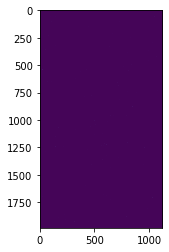

In [58]:
plt.imshow(pic)

In [60]:
pic.min(), pic.max()

(-2040.434814453125, 143122.765625)

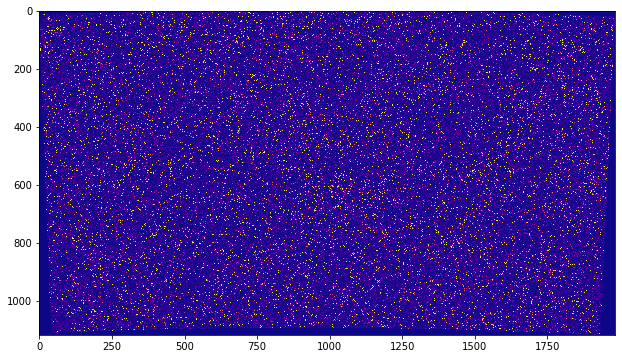

In [80]:
fig= plt.figure(figsize=(10,8))
ax= fig.add_axes([0.1,0.1,0.8,0.8])

im = ax.imshow(pic.T, cmap=plt.get_cmap('plasma'), interpolation='nearest',
               vmin=0, vmax=5)

In [81]:
logpic = np.log(pic)

/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


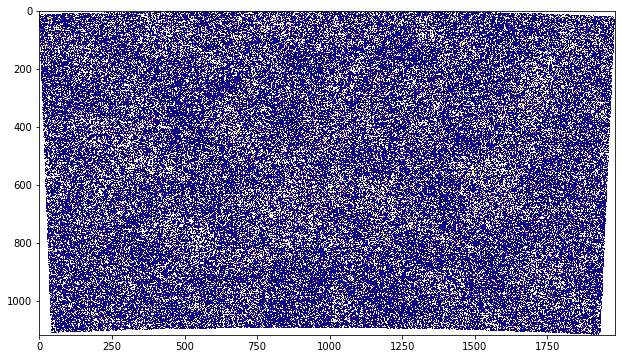

In [83]:
fig= plt.figure(figsize=(10,8))
ax= fig.add_axes([0.1,0.1,0.8,0.8])

im = ax.imshow(logpic.T, cmap=plt.get_cmap('plasma'), interpolation='nearest',
               vmin=0, vmax=1)

In [96]:
circles = np.zeros(pic.T.shape, dtype=np.float64)

In [88]:
logpic[np.isnan(logpic)] = 0

In [89]:
logpic.max()

11.871458041815071

In [97]:
for i in tqdm(range(radec.shape[0])):
    flux = coma_hdul[1].data['FLUX_G'][i]
    x, y = pixels[i]
    if (np.abs(np.log(flux)) > 1000):
        continue
    circles[circle(x, y, np.log(flux), shape=circles.shape)] += flux

/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


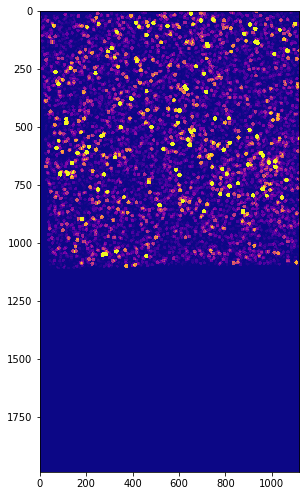

In [102]:
fig= plt.figure(figsize=(10,8))
ax= fig.add_axes([0.1,0.1,0.8,0.8])

im = ax.imshow(circles.T, cmap=plt.get_cmap('plasma'), interpolation='nearest',
               vmin=0, vmax=10000)